# Lending Club: predicing creditworthiness

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime 

In [2]:
# import raw data

df_raw = pd.read_csv('C:\\Users\sonja tilly.ABERDEEN\\LendingClub.csv', low_memory=False)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 21 columns):
Loan Amount                          24776 non-null int64
Loan Term                            24776 non-null object
Employment Length                    24776 non-null float64
Home Ownership                       24776 non-null object
Annual Income                        24776 non-null float64
Loan Purpose                         24776 non-null object
Address State                        24775 non-null object
Debt To Income Ratio                 24775 non-null float64
No. Delinquencies In Last 2 Years    24775 non-null object
Earliest Credit Line Opened          24776 non-null float64
FICO Credit Score                    24775 non-null float64
No. Inquiries In Last 6 Months       24775 non-null float64
Months Since Last Delinquency        24776 non-null int64
No. Of Credit Lines                  24775 non-null float64
No. Adverse Public Records           24775 non-null object
T

The dataset contains a mix of datatypes. 
The objects need to be converted into numerical values. 
The feature 'Class' will be the target and its values will be converted in '0' and '1'.

## Exploratory Data Analysis

In [4]:
# let's have a look at the target variable.

count = df_raw['Class'].value_counts()
count

Creditworthy      20274
Uncreditworthy     4502
Name: Class, dtype: int64

In [5]:
# convert 'Class' feature (=target) into numerical values

def credit_worthiness(status):
    if status == 'Creditworthy':
        return 0
    elif status == 'Uncreditworthy':
        return 1
    else:
        return status

df_raw['Class_new'] = df_raw['Class'].apply(credit_worthiness)


In [6]:
# calculate percentage
total = len(df_raw.index)
credit = df_raw['Class_new'].value_counts()

creditworthy = round((credit[0]/total)*100,2)
uncreditworthy = round((credit[1]/total)*100,2)
print(creditworthy)
print(uncreditworthy)


0.0
0.0


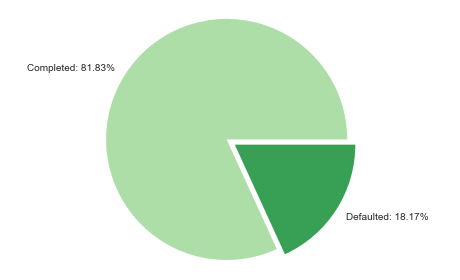

In [7]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 60

sums = df_raw.Class_new.groupby(df_raw.Class_new).value_counts()

colors = sns.color_palette("Greens", n_colors=2, desat=1)

explode=(0.04, 0.04)
plt.pie([count[0], count[1]], labels=['Completed: 81.83%', 'Defaulted: 18.17%'],\
       explode=explode, colors=colors)
plt.axis('equal')
plt.tight_layout()

The dataset is unbalanced, with uncreditworthy observations only accounting for 18.17%.

The unbalanced nature of the data will have to be considered when making predictions.

In [8]:
# what is the link between loan purpose and creditworthiness?

table = pd.pivot_table(df_raw, values='Loan Amount', index='Loan Purpose', \
                        columns='Class_new', aggfunc='count').fillna(0)
table.columns = ['good', 'bad']
table['Sum'] = table['good'] + table['bad']
table['percent_good'] = table['good']/table['Sum']*100
table['percent_bad'] = table['bad']/table['Sum']*100

table.drop(table.columns[[0, 1, 2]], axis=1, inplace=True)
table = table[1: :]


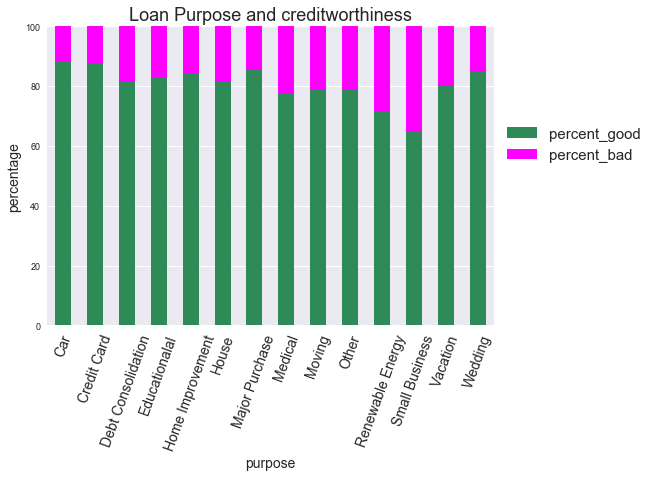

In [114]:
colors = ('seagreen','magenta')
ax= table.plot(legend=False, kind='bar',stacked=True, ylim=(0,100), color=colors, fontsize=9,\
                title='Loan Purpose and creditworthiness')
plt.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
ax.set_xticklabels(table.index, rotation=70, fontsize=14)
ax.set_xlabel('purpose', fontsize=14)
ax.set_ylabel('percentage', fontsize=14)

In [10]:
# what is the link between home ownership and creditworthiness?

table1 = pd.pivot_table(df_raw, values='Loan Amount', index='Home Ownership', \
                        columns='Class_new', aggfunc='count').fillna(0)
table1.columns = ['good', 'bad']
table1['Sum'] = table1['good'] + table1['bad']
table1['percent_good'] = table1['good']/table1['Sum']*100
table1['percent_bad'] = table1['bad']/table1['Sum']*100

table1.drop(table1.columns[[0, 1, 2]], axis=1, inplace=True)
table1 = table1.iloc[1: :]
table1

,percent_good,percent_bad
Home Ownership,,
NOne,100.000000,0.000000
OTHER,82.653061,17.346939
OWN,81.030213,18.969787
RENT,80.452830,19.547170


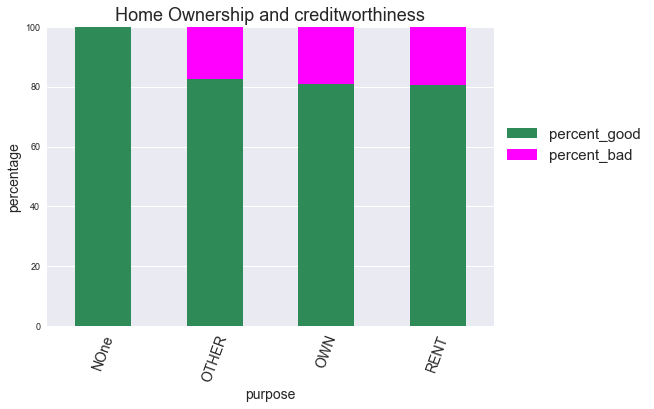

In [115]:
colors = ('seagreen','magenta')
ax1= table1.plot(legend=False, kind='bar',stacked=True, ylim=(0,100), color=colors, fontsize=9,\
                title='Home Ownership and creditworthiness')
plt.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
ax1.set_xticklabels(table1.index, rotation=70, fontsize=14)
ax1.set_xlabel('purpose', fontsize=14)
ax1.set_ylabel('percentage', fontsize=14)

In [12]:
#How is loan performance related to address state?

table2 = pd.pivot_table(df_raw, values='Loan Amount', index='Address State', columns=['Class_new'], aggfunc='count').fillna(0)
table2.columns=[['good', 'bad']]
table2['Sum']=table2['good']+table2['bad']
table2['%good']=table2['good']/table2['Sum']*100
table2['%bad']=table2['bad']/table2['Sum']*100
table2.index = table2.index.astype(str)
table2['above mean'] = table2['%bad'] - table2['%bad'].mean()  
print(table2)

                 good    bad     Sum       %good       %bad  above mean
Address State                                                          
AK               49.0    8.0    57.0   85.964912  14.035088   -2.501998
AL              240.0   45.0   285.0   84.210526  15.789474   -0.747612
AR              132.0   18.0   150.0   88.000000  12.000000   -4.537086
AZ              487.0  112.0   599.0   81.302170  18.697830    2.160744
CA             3552.0  933.0  4485.0   79.197324  20.802676    4.265590
CO              431.0   81.0   512.0   84.179688  15.820312   -0.716773
CT              390.0   78.0   468.0   83.333333  16.666667    0.129581
DC              127.0   11.0   138.0   92.028986   7.971014   -8.566071
DE               61.0   11.0    72.0   84.722222  15.277778   -1.259308
FL             1328.0  413.0  1741.0   76.278001  23.721999    7.184913
GA              694.0  181.0   875.0   79.314286  20.685714    4.148629
HI               89.0   21.0   110.0   80.909091  19.090909    2

In [13]:
#Plot bad loans on map

import plotly.plotly as py
py.sign_in('Son17', 't1lGbnK94WAIem0Z2lVh')

data = [ dict(
        type='choropleth',
        colorscale = 'Greens',
        autocolorscale = False,
        locations = table2.index,
        z = table2['%bad'].astype(float).round(2),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(title = "Portion of uncreditworthy loans (%)"))]

layout = dict(
        title = 'Uncreditworthy loans by state (%)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),)
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

ImportError: No module named plotly.plotly

In [14]:
#Plot bad loans on map

import plotly.plotly as py
py.sign_in('Son17', 't1lGbnK94WAIem0Z2lVh')

data = [ dict(
        type='choropleth',
        colorscale = 'Greens',
        autocolorscale = False,
        locations = table2.index,
        z = table2['Sum'].astype(float).round(2),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(title = "Number of uncreditworthy loans"))]

layout = dict(
        title = 'Uncreditworthy loans by state in absolute numbers',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),)
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

ImportError: No module named plotly.plotly

In [15]:
# what is the link between No. Of Public Record Bankruptcies and creditworthiness?

table3 = pd.pivot_table(df_raw, values='Loan Amount', index='No. Of Public Record Bankruptcies', \
                        columns='Class_new', aggfunc='count').fillna(0)
table3.columns = ['good', 'bad']
table3['Sum'] = table3['good'] + table3['bad']
table3['percent_good'] = table3['good']/table3['Sum']*100
table3['percent_bad'] = table3['bad']/table3['Sum']*100

table3.drop(table3.columns[[0, 1, 2]], axis=1, inplace=True)
table3 = table3.iloc[0: :]
table3

,percent_good,percent_bad
No. Of Public Record Bankruptcies,,
None,82.165096,17.834904
One,73.878365,26.121635
Two,80.000000,20.000000


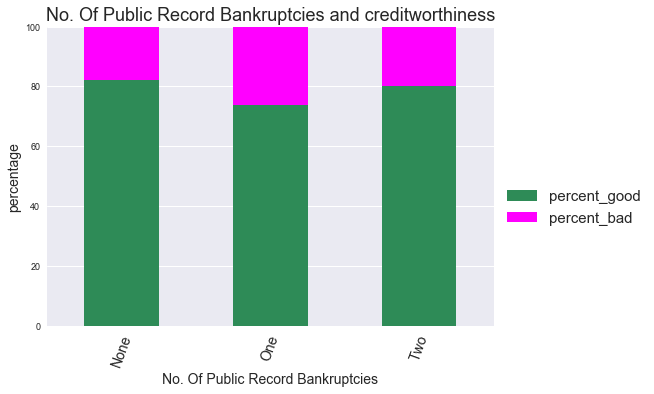

In [116]:
colors = ('seagreen','magenta')
ax3= table3.plot(legend=False, kind='bar',stacked=True, ylim=(0,100), color=colors, fontsize=9,\
                title='No. Of Public Record Bankruptcies and creditworthiness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
ax3.set_xticklabels(table3.index, rotation=70, fontsize=14)
ax3.set_xlabel('No. Of Public Record Bankruptcies', fontsize=14)
ax3.set_ylabel('percentage', fontsize=14)

In [17]:
# what is the link between FICO Credit Score and creditworthiness?

table4 = pd.pivot_table(df_raw, values='Loan Amount', index='FICO Credit Score', \
                        columns='Class_new', aggfunc='count').fillna(0)
table4.columns = ['good', 'bad']
table4['Sum'] = table4['good'] + table4['bad']
table4['percent_good'] = table4['good']/table4['Sum']*100
table4['percent_bad'] = table4['bad']/table4['Sum']*100

table4.drop(table4.columns[[0, 1, 2]], axis=1, inplace=True)
table4 = table4.iloc[0: :]
table4.head()

,percent_good,percent_bad
FICO Credit Score,,
625.0,100.000000,0.000000
630.0,100.000000,0.000000
660.0,71.138211,28.861789
665.0,71.714534,28.285466
670.0,73.128120,26.871880


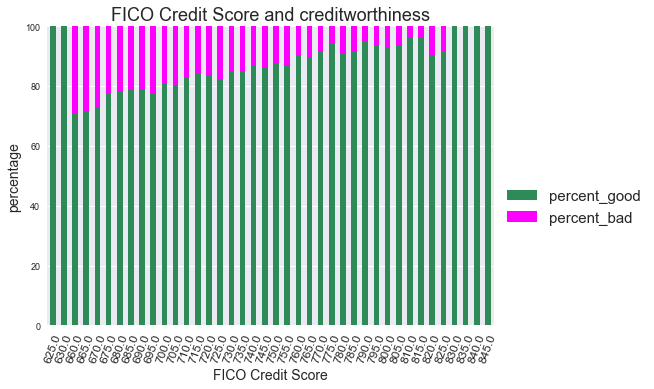

In [117]:
colors = ('seagreen','magenta')
ax4= table4.plot(legend=False, kind='bar',stacked=True, ylim=(0,100), color=colors, fontsize=9,\
                title='FICO Credit Score and creditworthiness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
ax4.set_xticklabels(table4.index, rotation=70, fontsize=12)
ax4.set_xlabel('FICO Credit Score', fontsize=14)
ax4.set_ylabel('percentage', fontsize=14)

In [19]:
# what is the link between No. Adverse Public Records and creditworthiness?

table5 = pd.pivot_table(df_raw, values='Loan Amount', index='No. Adverse Public Records', \
                        columns='Class_new', aggfunc='count').fillna(0)
table5.columns = ['good', 'bad']
table5['Sum'] = table5['good'] + table5['bad']
table5['percent_good'] = table5['good']/table5['Sum']*100
table5['percent_bad'] = table5['bad']/table5['Sum']*100

table5.drop(table5.columns[[0, 1, 2]], axis=1, inplace=True)
table5 = table5.iloc[0: :]
table5.head()

,percent_good,percent_bad
No. Adverse Public Records,,
Four,100.000000,0.000000
None,82.315619,17.684381
One,72.763578,27.236422
Three,100.000000,0.000000
Two,75.757576,24.242424


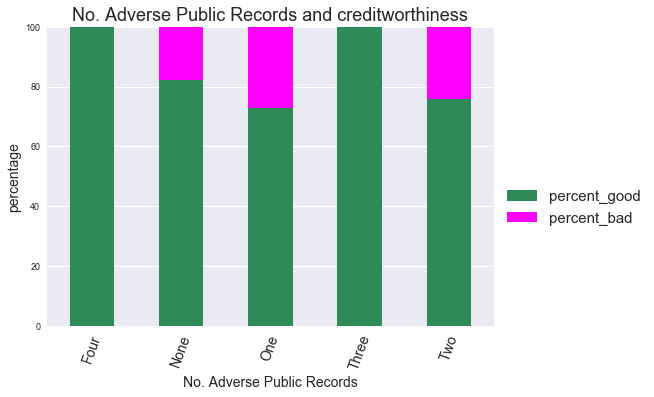

In [118]:
colors = ('seagreen','magenta')
ax5= table5.plot(legend=False, kind='bar',stacked=True, ylim=(0,100), color=colors, fontsize=9,\
                title='No. Adverse Public Records and creditworthiness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
ax5.set_xticklabels(table5.index, rotation=70, fontsize=14)
ax5.set_xlabel('No. Adverse Public Records', fontsize=14)
ax5.set_ylabel('percentage', fontsize=14)

# Data preprocessing

In [21]:
# summarise address states into geographic regions

East_Coast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'PA', 'NJ', 'DE', 'MD', 'VA', 'PA', 'DC']
West_Coast = ['CA']
North = ['WA', 'OR', 'ID', 'MT', 'WY', 'SD','MN', 'WI', 'MI', 'AK']
South = ['AZ', 'NM', 'TX', 'OK', 'LA', 'AR', 'MS', 'AL', 'GA', 'FL', 'SC', 'NC', 'TN', 'HI']
Middle = ['NV', 'UT', 'CO', 'KS', 'NE', 'IA', 'MO', 'IL', 'IN', 'KY', 'WV', 'OH']

In [22]:
df_raw['Address State'] = df_raw['Address State'].replace(East_Coast, 'East_Coast')
df_raw['Address State'] = df_raw['Address State'].replace(West_Coast, 'West_Coast')
df_raw['Address State'] = df_raw['Address State'].replace(North, 'North')
df_raw['Address State'] = df_raw['Address State'].replace(South, 'South')
df_raw['Address State'] = df_raw['Address State'].replace(Middle, 'Middle') 

df_raw['Address State'].value_counts()

East_Coast    7731
South         6885
West_Coast    4485
Middle        3461
North         2213
Name: Address State, dtype: int64

In [23]:
# summarise FICO scores into categories

def summarise(fico):
    if 300 >= fico < 579:
        return 'Very Poor'
    if 580 >= fico < 669:
        return 'Fair'
    if 670 >= fico < 739:
        return 'Good'
    if 740 >= fico < 799:
        return 'Very Good'
    if 800 >= fico <= 850:
        return 'Exceptional'

In [24]:
df_raw['FICO Credit Score'] = df_raw['FICO Credit Score'].apply(summarise)
df_raw['FICO Credit Score'].value_counts()

Very Good      15950
Exceptional     5208
Good            3337
Name: FICO Credit Score, dtype: int64

In [25]:
# create dummy variables for categorical data

df_raw = pd.get_dummies(df_raw, columns=['Loan Term','Home Ownership', 'Loan Purpose', \
                                         'FICO Credit Score','Address State'])

In [26]:
# encode remaining columns containing object data types

from sklearn import preprocessing 

cols = ['No. Delinquencies In Last 2 Years', 'No. Adverse Public Records',\
           'No. Of Public Record Bankruptcies']

le = preprocessing.LabelEncoder()

def labelencoder(input):
    if input == 'None':
        return 0
    elif input == 'One':
        return 1
    elif input == 'Two':
        return 2
    elif input == 'Three':
        return 3
    elif input == 'Four':
        return 4
    elif input == 'Five':
        return 5
    elif input == 'Six':
        return 6
    elif input == 'Seven':
        return 7
    elif input == 'Eight':
        return 8
    elif input == 'Nine':
        return 9
    else:
        return input

for c in cols:    
    df_raw[c] = df_raw[c].apply(labelencoder)


In [27]:
# drop redundant feature

df_raw.drop('Class', axis=1, inplace=True)

In [28]:
# deal with nan values

data = df_raw.fillna(df_raw.median())

In [29]:
data.describe()

,Loan Amount,Employment Length,Annual Income,Debt To Income Ratio,No. Delinquencies In Last 2 Years,Earliest Credit Line Opened,No. Inquiries In Last 6 Months,Months Since Last Delinquency,No. Of Credit Lines,No. Adverse Public Records,...,Loan Purpose_Vacation,Loan Purpose_Wedding,FICO Credit Score_Exceptional,FICO Credit Score_Good,FICO Credit Score_Very Good,Address State_East_Coast,Address State_Middle,Address State_North,Address State_South,Address State_West_Coast
count,24776.000000,24776.000000,24776.000000,24776.000000,24776.000000,24776.000000,24776.000000,24776.000000,24776.000000,24776.000000,...,24776.000000,24776.000000,24776.000000,24776.000000,24776.000000,24776.000000,24776.000000,24776.000000,24776.000000,24776.000000
mean,11115.051865,4.810119,67178.127238,13.233087,0.152648,35647.665675,0.952696,12.845899,9.429085,0.054004,...,0.008476,0.023248,0.210203,0.134687,0.643768,0.312036,0.139692,0.089320,0.277890,0.181022
std,7334.153775,3.528494,37288.333082,6.908916,0.500119,2243.580467,1.111804,21.556324,4.512968,0.235989,...,0.091676,0.150694,0.407461,0.341396,0.478895,0.463334,0.346674,0.285211,0.447968,0.385044
min,500.000000,0.000000,4000.000000,0.000000,0.000000,30000.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,2.000000,41000.000000,7.940000,0.000000,34411.236115,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.000000,4.000000,60000.000000,13.270000,0.000000,36043.425690,1.000000,0.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.000000,8.000000,83000.000000,18.560000,0.000000,37202.679688,2.000000,21.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,35000.000000,10.000000,200000.000000,34.980000,9.000000,40075.198610,8.000000,106.000000,49.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dealing with outliers

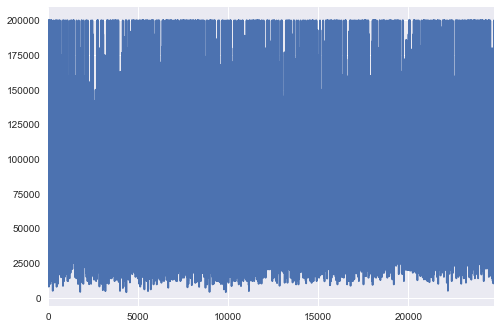

In [30]:
data['Annual Income'].plot()

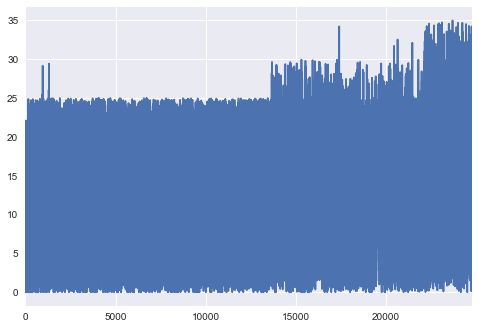

In [31]:
data['Debt To Income Ratio'].plot()

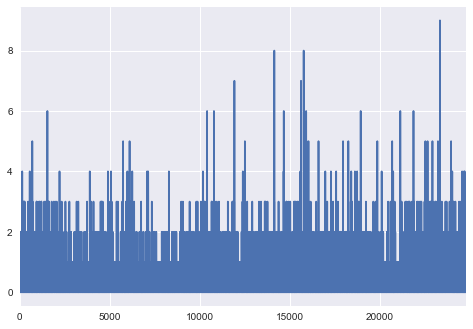

In [32]:
data['No. Delinquencies In Last 2 Years'].plot()

In [33]:
# most values lie between 0 and 4, therefore I will take out any values above.

delinq = data['No. Delinquencies In Last 2 Years']<=4

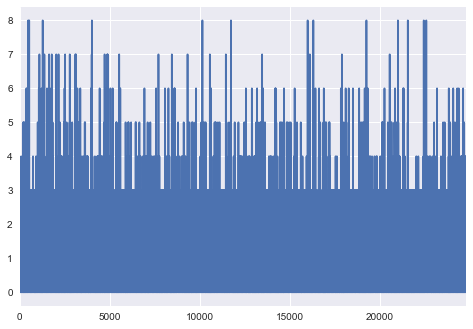

In [34]:
data['No. Inquiries In Last 6 Months'].plot()

In [35]:
# most features lie between 0 and 7, hence I will take out any features above.

inq = data['No. Inquiries In Last 6 Months'] <= 7

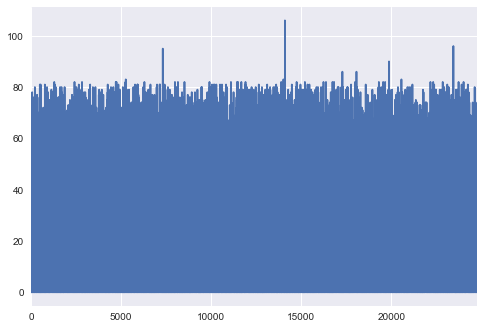

In [36]:
data['Months Since Last Delinquency'].plot()

In [37]:
# most features lie below 85, hence I will take out features above 

mon = data['Months Since Last Delinquency'] <=85

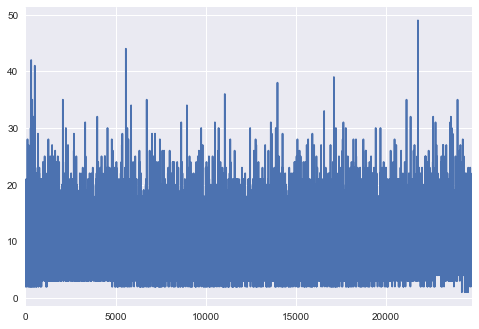

In [38]:
data['No. Of Credit Lines'].plot()

In [39]:
# most values are below 30, hence I will take out values above 30

lines = data['No. Of Credit Lines'] <=30

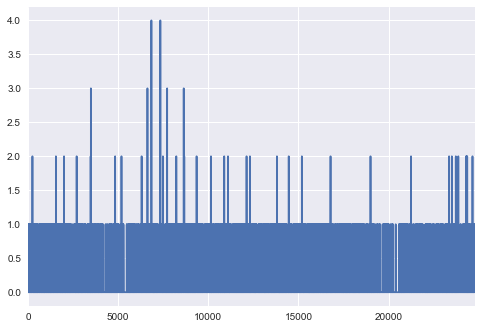

In [40]:
data['No. Adverse Public Records'].plot()

In [41]:
# most values lie at 1, hence I will take out values above 1

adv = data['No. Adverse Public Records'] <= 1

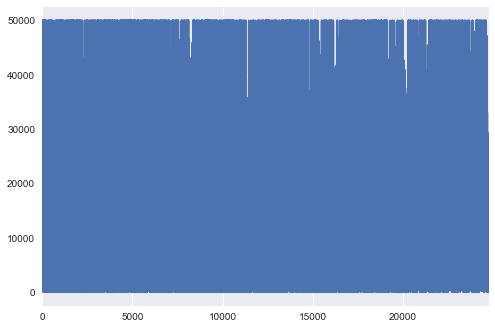

In [42]:
data['Total Credit Balance'].plot()

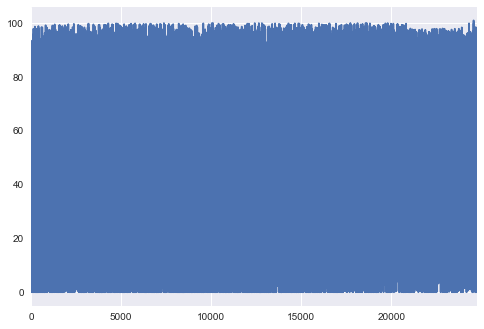

In [43]:
data['Use Of Credit Line'].plot()

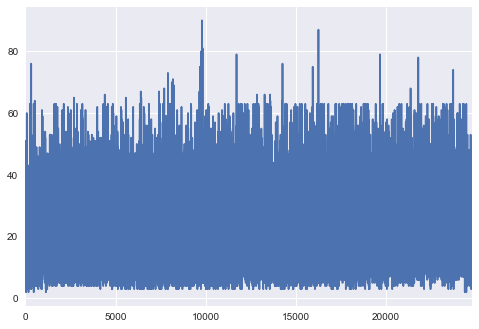

In [44]:
data['Total Number Of Credit Lines'].plot()

In [45]:

crd = data['Total Number Of Credit Lines'] <= 65

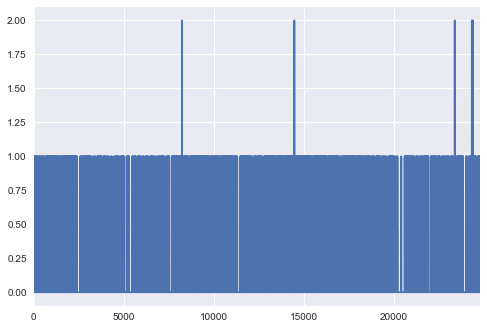

In [46]:
data['No. Of Public Record Bankruptcies'].plot()

In [47]:

bank = data['No. Of Public Record Bankruptcies'] <= 1


In [48]:
# filter out outliers

new_data = data[delinq & inq & mon & lines & adv & crd & bank]



In [49]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24638 entries, 0 to 24775
Data columns (total 46 columns):
Loan Amount                          24638 non-null int64
Employment Length                    24638 non-null float64
Annual Income                        24638 non-null float64
Debt To Income Ratio                 24638 non-null float64
No. Delinquencies In Last 2 Years    24638 non-null float64
Earliest Credit Line Opened          24638 non-null float64
No. Inquiries In Last 6 Months       24638 non-null float64
Months Since Last Delinquency        24638 non-null int64
No. Of Credit Lines                  24638 non-null float64
No. Adverse Public Records           24638 non-null float64
Total Credit Balance                 24638 non-null float64
Use Of Credit Line                   24638 non-null float64
Total Number Of Credit Lines         24638 non-null float64
Loan Application Description         24638 non-null int64
No. Of Public Record Bankruptcies    24638 non-null int64

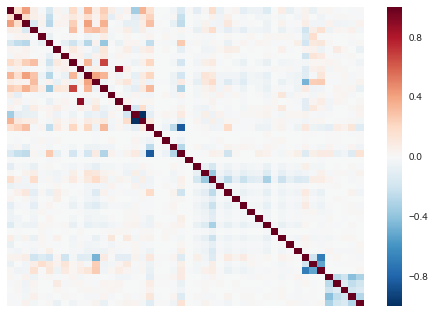

In [50]:
corr = new_data.corr()
sns.heatmap(corr, xticklabels='', yticklabels='')

# Define X and y

In [51]:
# define X and y

y = new_data['Class_new']
y.columns = ['Class']
X = new_data.drop(['Class_new'], axis=1)

In [52]:
# train test split
# stratify target y as it may not be normally distributed

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,\
                                                    stratify=y)

# Classification with GridSearchCV and recursive feature elimination

In [97]:
# build logistic regression model
# address unbalanced classes with parameter 'class_weights'

from sklearn import linear_model
from sklearn.metrics import roc_auc_score

estimator = linear_model.LogisticRegression(random_state=42, class_weight={0:0.1817, 1:0.8183})

estimator.fit(X_train, y_train)

y_pred_regr = estimator.predict(X_test)

# Assess benchmark model performance using area under the curve (AUC)

from sklearn.metrics import roc_auc_score

AUC = roc_auc_score(y_test, y_pred_regr)
print("The AUC score for a simple Logistic Regression model is {:.4f}.".format(AUC))

The AUC score for a simple Logistic Regression model is 0.6584.


In [98]:
# tuning model parameters

from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.1, 1, 2, 3], 'penalty': ['l1','l2']}
             
gsregr = GridSearchCV(estimator, param_grid, cv=8)
    
gsregr.fit(X_train, y_train)

# what are the best parameters?

print(gsregr.best_params_)

{'penalty': 'l1', 'C': 2}


In [100]:
# build optimised model

estimator_opt = linear_model.LogisticRegression(random_state=42, C=2, penalty='l1', class_weight={0:0.1817, 1:0.8183})

estimator_opt.fit(X_train, y_train)

y_pred_opt = estimator_opt.predict(X_test)

# Assess benchmark model performance using area under the curve (AUC)

from sklearn.metrics import roc_auc_score

AUC = roc_auc_score(y_test, y_pred_opt)
print("The AUC score for a simple Logistic Regression model is {:.4f}.".format(AUC))

The AUC score for a simple Logistic Regression model is 0.6590.


In [95]:
# dimensionality reduction

from sklearn.feature_selection import RFE

selector = RFE(estimator, 39, step=1)
selector = selector.fit(X_train, y_train)


In [96]:
y_pred_RFE = selector.predict(X_test)

AUC_RFE = roc_auc_score(y_test, y_pred_RFE)
print("The AUC score for an optimised Logistic Regression model with reduced dimentionality is {:.4f}.".format(AUC_RFE))


The AUC score for an optimised Logistic Regression model with reduced dimentionality is 0.6600.


In [101]:
# calculate summary report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_RFE, target_names=target_names))


             precision    recall  f1-score   support

    class 0       0.90      0.67      0.77      6048
    class 1       0.31      0.65      0.41      1344

avg / total       0.79      0.67      0.70      7392



In [102]:
# look at the coefficients

coef = pd.DataFrame(gsregr.best_estimator_.coef_)
coef.columns = X_test.columns
coef = coef.transpose()
coef.columns = ['Coef_size']
coef_sorted = coef.sort_values('Coef_size', ascending=False)


In [103]:
# take the exponential of each of the coefficients to generate the odds ratios. 
# this tells you how a 1 unit increase or decrease in a variable affects the odds 
# of being admitted.

odds_ratio = np.exp(coef_sorted)
odds_ratio

,Coef_size
FICO Credit Score_Good,3.948234
FICO Credit Score_Very Good,2.635692
Loan Purpose_Small Business,2.624707
Loan Term_60 Months,2.193179
No. Adverse Public Records,1.882055
FICO Credit Score_Exceptional,1.676572
Loan Purpose_Medical,1.465377
Loan Purpose_Renewable Energy,1.395834
Address State_West_Coast,1.256469
No. Inquiries In Last 6 Months,1.232161


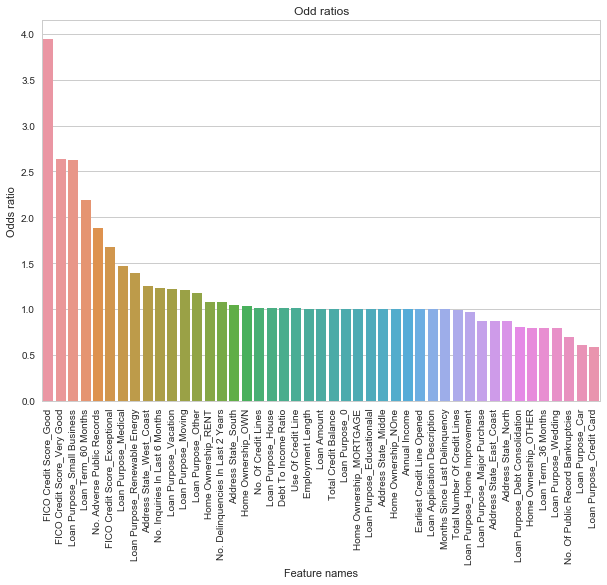

In [104]:
# plot odd ratios

sns.set(style='whitegrid')

f, ax = plt.subplots(figsize=(10,7))
ax = sns.barplot(x=odds_ratio.index, y=odds_ratio.Coef_size)
ax.set(xlabel='Feature names', ylabel='Odds ratio')
ax.set_title('Odd ratios')
for item in ax.get_xticklabels():
    item.set_rotation(90)

# How to interpret odd score

A score over 1 indicates a positive relationship with the target variable, a score below 1 a negative one.

For example, FICO Credit Score_Good has an odd ratio of 4.190637. This means than the odds for creditunworthiness are 319% higher than the odds for creditworthiness.

Odds of success = ratio of probability of success / probability of failure
If the probability of success is 50/50, the odds of success are 1/1 = 1

# ROC curve

In [105]:
from sklearn.metrics import roc_curve

probs = selector.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
AUC = roc_auc_score(y_test, y_pred_RFE)

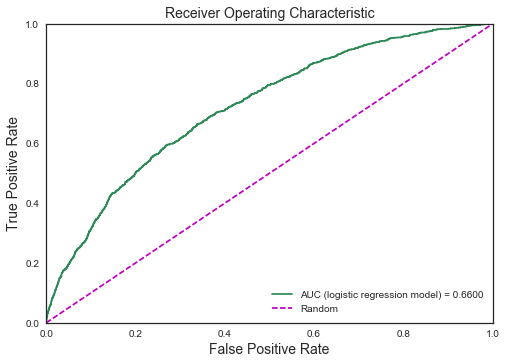

In [106]:
sns.set_style("white")

plt.title('Receiver Operating Characteristic', fontsize=14)
plt.plot(fpr, tpr, 'seagreen', label='AUC (logistic regression model) = %0.4f' % AUC_RFE)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'m--', label='Random')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.show()

# Confusion matrix

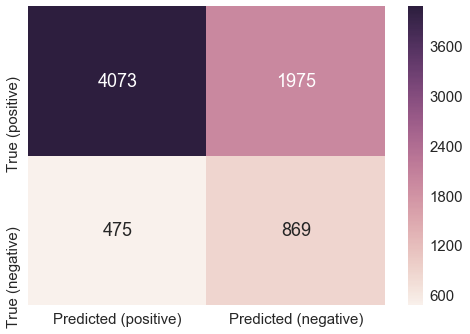

In [107]:
from sklearn.metrics import confusion_matrix

pred_values = selector.predict(X_test)

sns.set(font_scale=1.5)

cm = confusion_matrix(y_test, pred_values)

df_cm = pd.DataFrame(cm, index = ['True (positive)', 'True (negative)'])
df_cm.columns = ['Predicted (positive)', 'Predicted (negative)']

sns.heatmap(df_cm, annot=True, fmt="d")